# Differentiation

In [2]:
# Example 2.1: Light intensity from a single slit
from sympy import symbols, sin, diff
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

print('-'*28, 'CODE OUTPUT', '-'*29, '\n')

p = symbols('p', real=True)

intensity = lambdify(p, sin(p)**2/p**2)
deriv = lambdify(p, diff(sin(p)**2/p**2, p))
secondDeriv =  lambdify(p, diff(sin(p)**2/p**2, p, p))

print(intensity)
print(deriv)
print(secondDeriv)

---------------------------- CODE OUTPUT ----------------------------- 

<function _lambdifygenerated at 0x0000027496216480>
<function _lambdifygenerated at 0x0000027496216A20>
<function _lambdifygenerated at 0x000002748FC39A80>


The FirstderivativedI/dpis:
2*sin(p)*cos(p)/p**2 - 2*sin(p)**2/p**3

The SecondderivativeofI(p)is:
2*(-sin(p)**2 + cos(p)**2 - 4*sin(p)*cos(p)/p + 3*sin(p)**2/p**2)/p**2


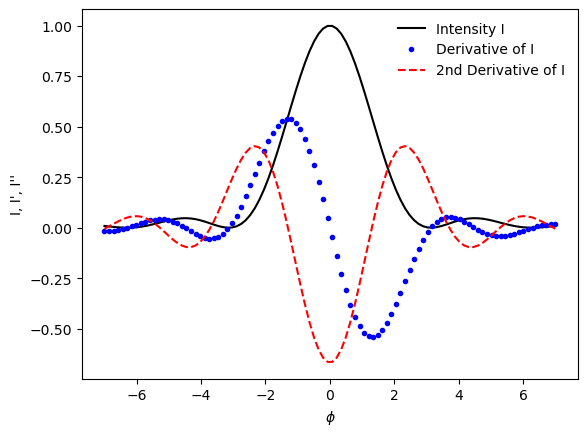

In [8]:
phase = np.linspace(-7, 7, 100)

# plot I(p)
plt.plot(phase, intensity(phase), 'k-', label='Intensity I')
plt.plot(phase, deriv(phase), 'b.', label='Derivative of I')
plt.plot(phase, secondDeriv(phase), 'r--', label='2nd Derivative of I')
plt.xlabel(r'$\phi$')
plt.ylabel("I, I', I''")
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)  # remove the black box from around the legend

f1 =diff(sin(p)**2/p**2,p)
print('The FirstderivativedI/dpis:')
print(f1)
f2 =diff(sin(p)**2/p**2,p,p)
print('\nThe SecondderivativeofI(p)is:')
print(f2)
plt.show()

In [9]:
# Example 2.2: The chain rule
from sympy import symbols, diff, sin
x, b = symbols('x, b', real=True)
print('-'*28, 'CODE OUTPUT', '-'*29, '\n')
s = diff(sin(b*sin(x))/(b*sin(x)),x)

print('Derivative of E-field is = ')
print(s)

---------------------------- CODE OUTPUT ----------------------------- 

Derivative of E-field is = 
cos(x)*cos(b*sin(x))/sin(x) - sin(b*sin(x))*cos(x)/(b*sin(x)**2)


## Differentiation analytical functions in python

In [17]:
# Example 2.3: Falling object with air resistance
from sympy import symbols, exp, diff, simplify
import numpy as np
import matplotlib.pyplot as plt

print('-'*28, 'CODE OUTPUT', '-'*29, '\n')
t, y0, m, v0, b, g = symbols('t, y0, m, v0, b, g', real=True)  # symbols
v = diff(y0+m*g*t/b + (m**2*g/b**2-m*v0/b)*(exp(-b*t/m)-1), t)
print(v)

a = diff(v,t)
a2 = diff(y0+m*g*t/b + (m**2*g/b**2-m*v0/b)*(exp(-b*t/m)-1), t, t)
a3 = diff(y0+m*g*t/b + (m**2*g/b**2-m*v0/b)*(exp(-b*t/m)-1), t, 2)
print(simplify(a))
print(simplify(a2))
print(simplify(a3))

---------------------------- CODE OUTPUT ----------------------------- 

-b*(-m*v0/b + g*m**2/b**2)*exp(-b*t/m)/m + g*m/b
(-b*v0 + g*m)*exp(-b*t/m)/m
(-b*v0 + g*m)*exp(-b*t/m)/m
(-b*v0 + g*m)*exp(-b*t/m)/m


---------------------------- CODE OUTPUT ----------------------------- 

v(t)= (b*v0 + g*m*exp(b*t/m) - g*m)*exp(-b*t/m)/b 

a(t)= (-b*v0 + g*m)*exp(-b*t/m)/m


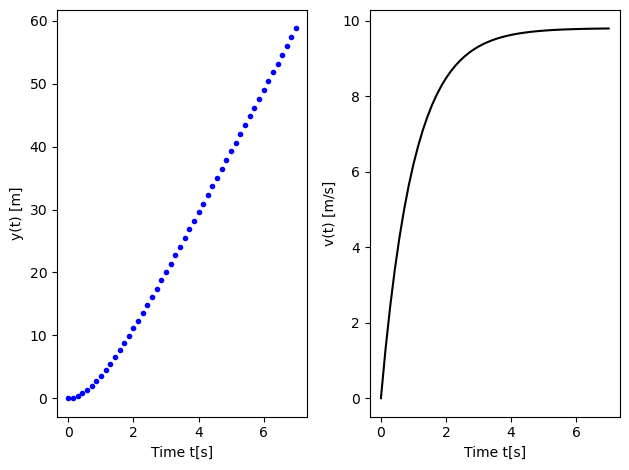

In [21]:
from sympy import symbols,exp,diff,simplify
import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')
t, y0,m,v0,b,g=symbols('t,y0,m,v0,b,g',real=True) #symbols
v =diff(y0+m*g*t/b+(m**2*g/b**2-m*v0/b)*(exp(-b*t/m)-1),t)#speedv(t)
print('v(t)=',simplify(v),'\n')
a =diff(v,t) # accelerationa(t)
print('a(t)=',simplify(a))
b, m,g,v0,y0=1.0,1,9.8,0,0#numericalvaluesfortheplots
tims =np.linspace(0,7,50)#timesttobeevaluated
yt =y0+m*g*tims/b+(m**2*g/b**2-m*v0/b)*(np.exp(-b*tims/m)-1)#arrayy(t)
vt =(b*v0+g*m*np.exp(b*tims/m)-g*m)*np.exp(-b*tims/m)/b#arrayv(t)
plt.subplot(1,2,1)
plt.plot(tims, yt, 'b.')
plt.xlabel('Time t[s]')
plt.ylabel('y(t) [m]')
plt.subplot(1,2,2)
plt.plot(tims, vt, 'k')
plt.xlabel('Time t[s]')
plt.ylabel('v(t) [m/s]')
plt.tight_layout()
plt.show()

In [24]:
# Three different equilibrium states: stable, unstable, and neural
# Example 2.4: The lennard-Jones potential
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

print('-'*28, 'CODE OUTPUT', '-'*29, '\n')
x = symbols('x', real=True)
F = -diff(((x**-12)-(x**-6)),x)
print('Force =', F)

---------------------------- CODE OUTPUT ----------------------------- 

Force = -6/x**7 + 12/x**13


In [25]:
force = lambda x: -12/x**13 + 6/x**7
print("Force=0 at x=", np.round(fsolve(force,1)[0],3), " m")  # 1是初始值

Force=0 at x= 1.122  m


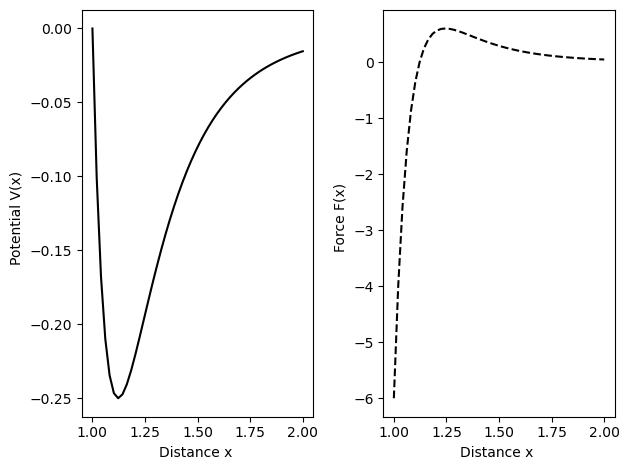

In [30]:
x = np.linspace(1, 2, 50)
plt.subplot(1, 2, 1)
plt.plot(x, (x**-12)-(x**-6), 'k')
plt.xlabel('Distance x ')
plt.ylabel('Potential V(x)  ')

plt.subplot(1, 2, 2)
plt.plot(x, -12/x**13 + 6/x**7, 'k--')
plt.xlabel('Distance x ')
plt.ylabel('Force F(x)  ')
plt.tight_layout()
plt.show()

## Maxwell-Boltzmann distribution (MB)

In [32]:
# Example 2.5: Most probable speed in the Maxwell-Boltzmann distribution
from sympy import symbols, pi, sqrt, exp, diff, Eq, solve
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
print('-'*28, 'code output', '-'*29, '\n')
v, m, k, T = symbols('v,m,k,T', positive=True)

f1 = sqrt(2/pi*((m/k*T))**3)*v**2*exp(-m*v**2/(2*k*T))
print(f1)

---------------------------- code output ----------------------------- 

sqrt(2)*T**(3/2)*m**(3/2)*v**2*exp(-m*v**2/(2*T*k))/(sqrt(pi)*k**(3/2))


In [35]:
deriv = diff(f1, v)
print(simplify(deriv))

sqrt(2)*sqrt(T)*m**(3/2)*v*(2*T*k - m*v**2)*exp(-m*v**2/(2*T*k))/(sqrt(pi)*k**(5/2))


In [37]:
eq1 = Eq(deriv,0)
vp = solve(eq1, v)[0]  # solve symbolically df/dv=0
print("Symbolic vp from SymPy = ", simplify(vp))

Symbolic vp from SymPy =  sqrt(2)*sqrt(T)*sqrt(k)/sqrt(m)


In [38]:
# PPlot MD distribution fo speeds for Helium
m =6.6464731e-27#atomicmassHeliuminkg
T =300 # roomtemperatureinK
k =1.380649e-23#BoltzmannconstantinJ/K
print("Numerical vp from SymPy = ", round(np.sqrt(2*k*T/m),3), " m/s")

Numerical vp from SymPy =  1116.405  m/s


In [40]:
v1 = np.linspace(1, 3000, 100)
a =np.sqrt(2/np.pi*((m/(k*T))**3))
b =m/(2*k*T)
f =lambda v:a*v**2*np.exp(-b*v**2)  # definefunctionforf(v)

der = lambda v: np.sqrt(2)*m**(3/2)*v*(2*T*k-m*v**2)*\
    np.exp(-m*v**2/(2*T*k))/(np.sqrt(np.pi)*T**(5/2)*k**(5/2))

Numerical vp using fsolve command: 1116.405 m/s


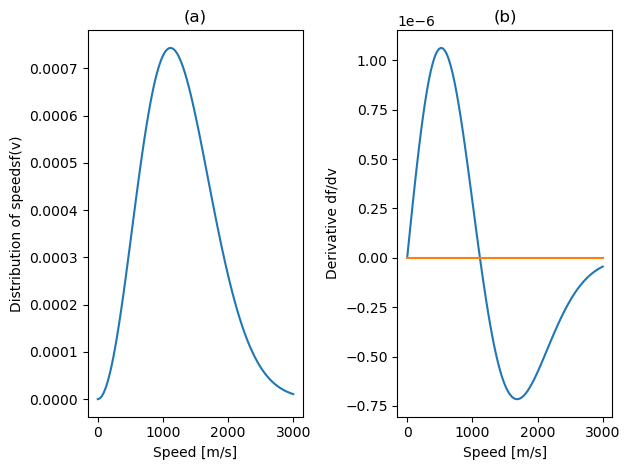

In [42]:
plt.subplot(1,2,1)
plt.plot(v1,f(v1))
plt.title('(a)')
plt.xlabel('Speed [m/s]')
plt.ylabel('Distribution of speedsf(v)')
plt.subplot(1,2,2)
plt.plot(v1,der(v1))
plt.title('(b)')
plt.xlabel('Speed [m/s]')
plt.ylabel('Derivative df/dv')
plt.plot(v1,[0]*len(v1))
vp=np.round(fsolve(der,1000)[0],3)
print("Numerical vp using fsolve command:",vp,"m/s")
plt.tight_layout()
plt.show()

## Example 2.6: The 1D Schrodinger equation

In [43]:
from sympy import symbols, exp, diff, simplify
print('-'*28, 'code output', '-'*29, '\n')

x, m, omeg, hbar, A = symbols('x, m, omeg, hbar, A', positive=True)
psi = A*exp(-m*omeg*x**2/(2*hbar))  # wave function
lhs = -(hbar**2)/(2*m)*diff(psi,x,x)+m*omeg**2*x**2*psi/2
print('LHS of Schrodinger Equation = ', simplify(lhs))

rhs = hbar * omeg * psi /2
print('LHS of Schrodinger Equation = ', simplify(rhs))

---------------------------- code output ----------------------------- 

LHS of Schrodinger Equation =  A*hbar*omeg*exp(-m*omeg*x**2/(2*hbar))/2
LHS of Schrodinger Equation =  A*hbar*omeg*exp(-m*omeg*x**2/(2*hbar))/2


## 2.3 A detailed example: derivation of wien's displacement law

### Example 2.7: Planck's law of black-body radiation

In [46]:
from sympy import symbols, exp, diff, fraction, simplify
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

x = symbols('x', real=True)
fv = (x**5)/(exp(x)-1)
dfdv = -diff(fv, x)
print(dfdv)

x**5*exp(x)/(exp(x) - 1)**2 - 5*x**4/(exp(x) - 1)


In [48]:
numerator = fraction(simplify(dfdv))[0]  # find numerator only
print(numerator)

x**4*(x*exp(x) - 5*exp(x) + 5)


In [50]:
num = lambda x: x**4*(x*np.exp(x) - 5*np.exp(x) + 5)
print("df/dt=0, at x=", np.round(fsolve(num, 6)[0], 4))

df/dt=0, at x= 4.9651


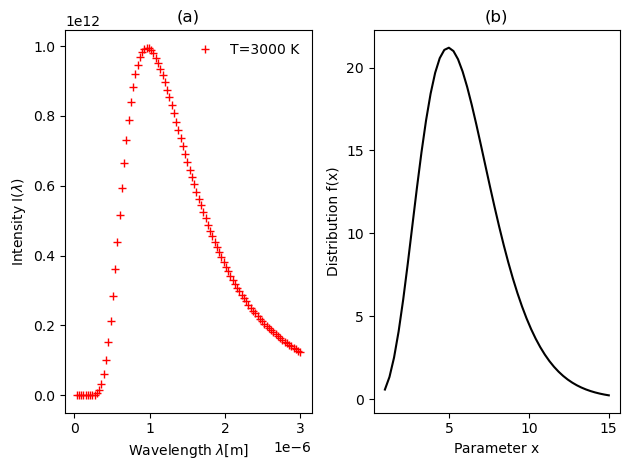

In [53]:
h =6.626e-34#PlanckconstantinJs
k =1.380649e-23#BoltzmannconstantinJ/K
c =2.998e8 # speedoflightm/s
T =3000 # TemperatureinK

f = lambda x:(2*h*c**2.0/x**5.0)*1/(np.exp(h*c/(x*k*T))-1)
x1 = np.linspace(3e-8, 3e-6, 100)

plt.subplot(1,2,1)
plt.plot(x1,f(x1),'r+',label='T=3000 K')
plt.xlabel('Wavelength $\lambda$[m]')
plt.ylabel(r'Intensity I(${\lambda}$)')
plt.title('(a)')
leg =plt.legend()

leg.get_frame().set_linewidth(0.0)
f =lambda x:(x**5)/(np.exp(x)-1)  #define I(x)
x =np.linspace(1,15,50)  # x values for plot
plt.subplot(1,2,2)
plt.plot(x, f(x), 'k')
plt.xlabel('Parameter x')
plt.ylabel('Distribution f(x)')
plt.title('(b)')
plt.tight_layout()
plt.show()

In [56]:
from sympy import nsolve,symbols,exp
x =symbols('x') # definesymbolx
root =nsolve(5*(exp(x)-1)-x*exp(x),x,5)#equationtosolve
print(root)

4.96511423174428


## 2.4 Derivatives of multivariable functions

### Example 2.8: Calculating partial derivatives

In [57]:
from sympy import symbols, sin, diff
x, y, c = symbols('x, y, c')
T = c*sin(x*y)

print('-'*28, 'code output', '-'*29, '\n')
print('Second partial w.r.t x = ', diff(T, x, 2))
print('Second partial w.r.t x, y= ', diff(T, x, y))
print('3rd partial w.r.t x, x, y = ', diff(T, x, x, y))

---------------------------- code output ----------------------------- 

Second partial w.r.t x =  -c*y**2*sin(x*y)
Second partial w.r.t x, y=  c*(-x*y*sin(x*y) + cos(x*y))
3rd partial w.r.t x, x, y =  -c*y*(x*y*cos(x*y) + 2*sin(x*y))


### 2.4.2 Total differentiations

### Example 2.9: The entropy of a monoatomic ideal gas

In [58]:
from sympy import symbols, diff, pi, log
print('-'*28, 'code output', '-'*29, '\n')
N, k, V, m, U, h, dV, dU = symbols('N, k, V, m, U, h, dV, dU',\
real=True)

S = N*k*(log((V/N)*((4*pi*m*U/(3*N*h**2))**(3/2))) + 5/2)
dS = diff(S, V)*dV + diff(S, U)*dU
print('dS=',dS)

---------------------------- code output ----------------------------- 

dS= 1.0*N*dV*k/V + 1.5*N*dU*k/U


### 2.4.3 Total derivative of a function-the chain rule revisited

### Example 2.10: Temperature changes in a rectangular plate

In [59]:
from sympy import symbols, diff, sin, exp
print('-'*28, 'code output', '-'*29, '\n')

x, y, a, b, c, t = symbols('x, y, a, b, c, t', real=True)
T = a * x ** 2 * t * sin(y)
x_fcn = c*t**2
y_fcn = b*exp(2*t)

print('The total derivative dT/dt is :')
diff(T.subs([(x, x_fcn), (y, y_fcn)]), t)

---------------------------- code output ----------------------------- 

The total derivative dT/dt is :


2*a*b*c**2*t**5*exp(2*t)*cos(b*exp(2*t)) + 5*a*c**2*t**4*sin(b*exp(2*t))

In [63]:
from sympy import Function, symbols, Derivative, sin
import textwrap

a, t = symbols('a, t')
x = Function('x')(t)
y = Function('y')(t)

T = a*x**2*t*sin(y)
deriv = str(Derivative(T, t).doit())

print('dT/dt is: ')
print(textwrap.fill(deriv, 80))
# print(deriv)

dT/dt is: 
a*t*x(t)**2*cos(y(t))*Derivative(y(t), t) +
2*a*t*x(t)*sin(y(t))*Derivative(x(t), t) + a*x(t)**2*sin(y(t))


### 2.4.4 Maximum and minimum problems

### Example 2.11: Moment of inertia

In [68]:
from sympy import symbols, diff, solve
print('-'*28, 'code output', '-'*29, '\n')

x, y, m = symbols('x,y,m')
I = m*((x-1)**2+y**2) + (m/2)*(x**2 + (y-1)**2) + (2*m)*((x-2)**2 + (y-2)**2)
print(I)

---------------------------- code output ----------------------------- 

m*(x**2 + (y - 1)**2)/2 + m*(y**2 + (x - 1)**2) + 2*m*((x - 2)**2 + (y - 2)**2)


In [69]:
diff_I_x = diff(I, x)
diff_I_y = diff(I, y)
print('The coordinates of location P are:')
solve([diff_I_x, diff_I_y])

The coordinates of location P are:


[{x: 10/7, y: 9/7}]

## Power series approximations of functions

### Example 2.12: Calculating a Maclaurin series

In [71]:
from sympy import log, series, Symbol
x = Symbol('x')
maclaurin = series(log(1/(1+x)), x, x0=0, n=6)
print(maclaurin)

-x + x**2/2 - x**3/3 + x**4/4 - x**5/5 + O(x**6)


### Example 2.13: The displacement of a falling body experiencing air resistance

In [72]:
from sympy import exp, symbols, series

m, g, b, t = symbols('m, g, b, t')
y = m*g/b*t - g*m**2/b**2*(1 - exp(-b*t/m))
maclaurin = series(y, t, x0=0, n=4)

print(maclaurin)

g*t**2/2 - b*g*t**3/(6*m) + O(t**4)


### Example 2.14: The temperature of a metal disk

In [73]:
from sympy import symbols, series, exp, diff
a, sigma, x, y = symbols('a, sigma, x, y')
T = a*exp(-sigma*(x**2+y**2))
print(T)
print('diff x', diff(T,x))
print('diff y', diff(T,y))
print('second diff x', diff(T, x, x))
print('second diff y', diff(T, y, y))
print('second diff x, y', diff(T, x, y))

a*exp(-sigma*(x**2 + y**2))
diff x -2*a*sigma*x*exp(-sigma*(x**2 + y**2))
diff y -2*a*sigma*y*exp(-sigma*(x**2 + y**2))
second diff x 2*a*sigma*(2*sigma*x**2 - 1)*exp(-sigma*(x**2 + y**2))
second diff y 2*a*sigma*(2*sigma*y**2 - 1)*exp(-sigma*(x**2 + y**2))
second diff x, y 4*a*sigma**2*x*y*exp(-sigma*(x**2 + y**2))


## 2.6 Numerical evaluation of derivatives

### Example 2.15: Calculating derivatives from data

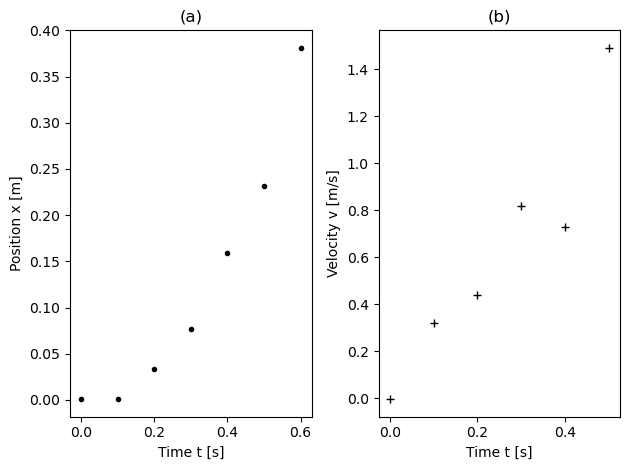

In [74]:
import numpy as np
import matplotlib.pyplot as plt

t =[0.0,0.1,0.2,0.3,0.4,0.5,0.6]#timedatat
x =[0.00119,0.00088,0.0331,0.0770,0.159,0.232,0.381]

delta_t = 0.1
v = [(x[i+1]-x[i])/delta_t for i in range(0, len(x)-1)]

plt.subplot(1, 2, 1)
plt.plot(t, x, 'k.')
plt.xlabel('Time t [s]')
plt.ylabel('Position x [m]')
plt.title('(a)')

plt.subplot(1, 2, 2)
plt.plot(t[:-1], v, 'k+')
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.title('(b)')
plt.tight_layout()
plt.show()

## 2.7 End of chapter problems

### 1. The kinetics of toy cars and using derivatives to predict future values

In [75]:
from sympy import symbols, diff

x, a, t = symbols('x, a, t')
y = 1/2*a*t**2
print(y)

0.5*a*t**2


In [76]:
dydt = diff(y, t)
print(dydt)

1.0*a*t


3.0


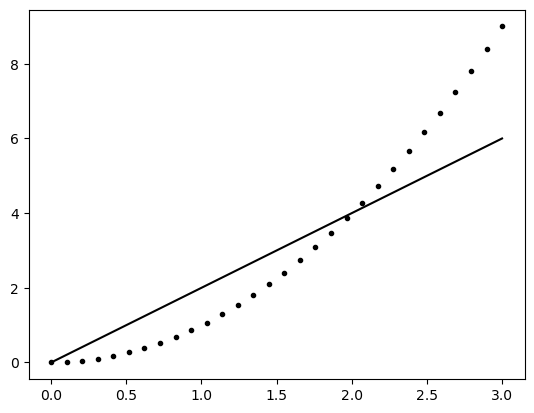

In [79]:
t = np.linspace(0, 3, 30)
f1 = lambda t: 0.5*2.0*t**2
f2 = lambda t: 1.0*2.0*t
plt.plot(t, f1(t), 'k.')
plt.plot(t, f2(t), 'k-')
print(f2(t=1.5))
plt.show()

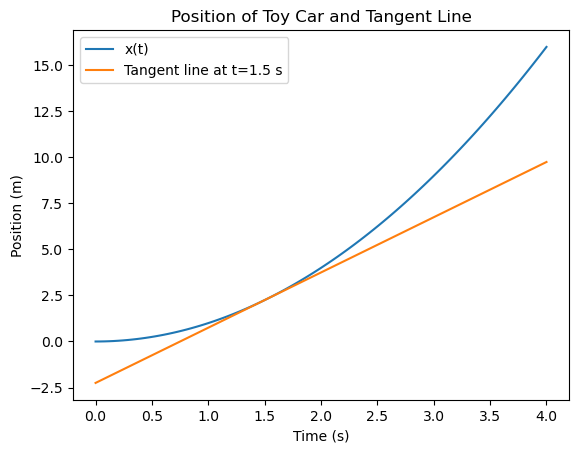

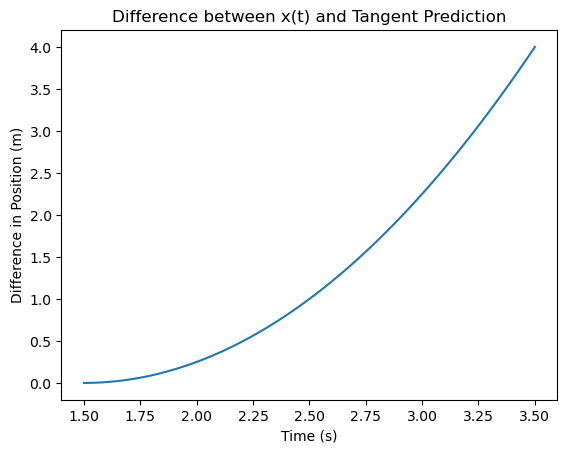

In [80]:
import numpy as np
import matplotlib.pyplot as plt


# Given acceleration
a = 2.0

# Function for the position of the toy car
def x(t):
    return 0.5 * a * t ** 2


# Part a
# Time points for plotting x(t)
t_vals = np.linspace(0, 4, 100)
x_vals = x(t_vals)

# Time for the tangent line
t_tangent = 1.5
# Calculate the position at t_tangent
x_tangent = x(t_tangent)
# Calculate the derivative of x(t) (velocity)
def v(t):
    return a * t
v_tangent = v(t_tangent)

# Equation of the tangent line y = mx + c, where m is slope and c is intercept
# Here m is v_tangent and we find c using x_tangent and t_tangent
c = x_tangent - v_tangent * t_tangent
tangent_line = v_tangent * t_vals + c

# Plot x(t) and the tangent line
plt.plot(t_vals, x_vals, label='x(t)')
plt.plot(t_vals, tangent_line, label=f'Tangent line at t={t_tangent} s')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position of Toy Car and Tangent Line')
plt.legend()
plt.show()


# Part b
# Time points for the next two seconds starting from t_tangent
t_next = np.linspace(t_tangent, t_tangent + 2, 100)
x_next = x(t_next)
tangent_prediction = v_tangent * t_next + c

# Calculate the difference
difference = x_next - tangent_prediction

# Plot the difference
plt.plot(t_next, difference)
plt.xlabel('Time (s)')
plt.ylabel('Difference in Position (m)')
plt.title('Difference between x(t) and Tangent Prediction')
plt.show()

# Explanation for why the difference increases with time
# The toy car has a non - zero acceleration. The tangent line represents a linear approximation
# (constant velocity motion as it's based on the velocity at a single point).
# Since the car is accelerating (its velocity is increasing over time),
# the actual position (which accounts for the acceleration) will deviate more and more
# from the prediction based on the constant - velocity tangent line as time progresses.

### 2. Equilibria of the Two-Body Problem

In [81]:
from sympy import symbols, diff, solve

l, me, r, G, ms, r = symbols('l, me, r, G, ms, r', real=True)

V = l**2/(2*me*r**2) - G*me*ms/r
print(V)
dVdr = diff(V, r)
print(dVdr)

r0 = solve(dVdr, r)
print(r0)

-G*me*ms/r + l**2/(2*me*r**2)
G*me*ms/r**2 - l**2/(me*r**3)
[l**2/(G*me**2*ms)]


### 3. Practice with partial derivatives

In [82]:
from sympy import symbols, diff, exp
a, lamda, x, y, t = symbols('a lamda x y t')
# 定义函数f
f = a * x**2 * exp(-lamda * (x**2 + y**2))
result_a = diff(f, x)
print("(∂f/∂x)_y 的结果是: ", result_a)

(∂f/∂x)_y 的结果是:  -2*a*lamda*x**3*exp(-lamda*(x**2 + y**2)) + 2*a*x*exp(-lamda*(x**2 + y**2))


In [83]:
result_b = diff(f, y)
print("(∂f/∂y)_x 的结果是: ", result_b)

(∂f/∂y)_x 的结果是:  -2*a*lamda*x**2*y*exp(-lamda*(x**2 + y**2))


In [85]:
from sympy import symbols, diff, exp, Function

a, lamda, x, y, t = symbols('a lamda x y t')
f = a * x ** 2 * exp(-lamda * (x ** 2 + y ** 2))

# a. 计算(∂f/∂x)_y
result_a = diff(f, x)
print("(∂f/∂x)_y 的结果是: ", result_a)

# b. 计算(∂f/∂y)_x
result_b = diff(f, y)
print("(∂f/∂y)_x 的结果是: ", result_b)

# 定义x(t)和y(t)为关于t的函数
x_t = Function('x')(t)
y_t = Function('y')(t)
f_t = f.subs({x: x_t, y: y_t})

# c. 计算∂f/∂t
result_c = diff(f_t, t)
print("∂f/∂t 的结果是: ", result_c)

# d. 计算df/dt
df_dx_t = diff(f_t, x_t)
df_dy_t = diff(f_t, y_t)
dx_dt = diff(x_t, t)
dy_dt = diff(y_t, t)
result_d = df_dx_t * dx_dt + df_dy_t * dy_dt
print("df/dt 的结果是: ", result_d)

(∂f/∂x)_y 的结果是:  -2*a*lamda*x**3*exp(-lamda*(x**2 + y**2)) + 2*a*x*exp(-lamda*(x**2 + y**2))
(∂f/∂y)_x 的结果是:  -2*a*lamda*x**2*y*exp(-lamda*(x**2 + y**2))
∂f/∂t 的结果是:  -a*lamda*(2*x(t)*Derivative(x(t), t) + 2*y(t)*Derivative(y(t), t))*x(t)**2*exp(-lamda*(x(t)**2 + y(t)**2)) + 2*a*x(t)*exp(-lamda*(x(t)**2 + y(t)**2))*Derivative(x(t), t)
df/dt 的结果是:  -2*a*lamda*x(t)**2*y(t)*exp(-lamda*(x(t)**2 + y(t)**2))*Derivative(y(t), t) + (-2*a*lamda*x(t)**3*exp(-lamda*(x(t)**2 + y(t)**2)) + 2*a*x(t)*exp(-lamda*(x(t)**2 + y(t)**2)))*Derivative(x(t), t)


### 4. Paritial differentiation and the chain rule